## More logistic regression

In this tutorial, we will look at:

* how to test the significance of the slope of a predictor in logistic regression
* how to perform logisitc regression using categorical predictor variables
* how to perform logistic regression using multiple predictor variables

We will be using the Titanic dataset, which contains data about the characteristics of passengers, and
whether they survived the Titanic incident.

In [1]:
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plots look more fancy.
plt.style.use('fivethirtyeight')
# Optimization function
from scipy.optimize import minimize
import statsmodels.api as sm

# importing the data
df = pd.read_csv('https://raw.githubusercontent.com/matthew-brett/cfd2020/master/data/titanic_clean.csv')

df.head(10)

,name,gender,age,class,embarked,country,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,Southampton,United States,7.1300,yes
6,"Abelson, Mr. Samuel",male,30.0,2nd,Cherbourg,France,24.0000,no
7,"Abelson, Mrs. Hannah",female,28.0,2nd,Cherbourg,France,24.0000,yes
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,Cherbourg,Lebanon,18.1509,yes
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,Southampton,Finland,7.1806,yes


We will use `survived` as our outcome variable. This is a binary categorical variable which can
take the values `yes` or `no`.

First we need to create a dummy variable for `survived`.

We will treat `survived == 'yes'` as the event of interest, and so will label this with a 1.

In [2]:
# create a dummy variable
df['survived_dummy'] = df['survived'].replace(['yes', 'no'], [1,0])
df.head(10)

,name,gender,age,class,embarked,country,fare,survived,survived_dummy
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes,1
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,Southampton,United States,7.1300,yes,1
6,"Abelson, Mr. Samuel",male,30.0,2nd,Cherbourg,France,24.0000,no,0
7,"Abelson, Mrs. Hannah",female,28.0,2nd,Cherbourg,France,24.0000,yes,1
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,Cherbourg,Lebanon,18.1509,yes,1
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,Southampton,Finland,7.1806,yes,1


First, let's predict `survived` from `fare`. Were people who paid a higher fare more likely to survive?

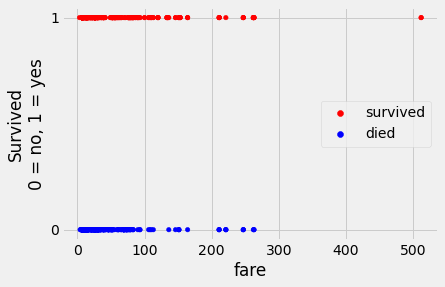

In [3]:
# a function to produce a plot of a continuous predictor and a binary outcome
def plot_survive_one_pred(df, predictor):
    # Build plot, add custom labels.
    colors = df['survived'].replace(['yes', 'no'], ['red', 'blue'])
    df.plot.scatter(predictor, 'survived_dummy', c=colors)
    plt.ylabel('Survived\n0 = no, 1 = yes')
    plt.yticks([0,1]);  # Just label 0 and 1 on the y axis.
    # Put a custom legend on the plot.  This code is a little obscure.
    plt.scatter([], [], c='red', label='survived')
    plt.scatter([], [], c='blue', label='died')
    # Show the legend
    plt.legend(loc = 'center right');

# Do the plot
plot_survive_one_pred(df, 'fare')

From graphical inspection, it looks like these variables might be related. It looks
as though a greater proportion of those who paid higher fare survived.

To test this, let's get the functions we used in the Logistic Regression notebook.

In [4]:
def inv_logit(y):
    """ Reverse logit transformation
    """
    odds_ratios = np.exp(y)  # Reverse the log operation.
    return odds_ratios / (odds_ratios + 1)  # Reverse odds ratios operation; return probabilities


def mll_logit_cost(intercept_and_slope, x, y):
    """ Cost function for maximum log likelihood

    Return minus of the log of the likelihood.
    """
    intercept, slope = intercept_and_slope
    # Make predictions for sigmoid.
    predicted_log_odds = intercept + slope * x
    pp_of_1 = inv_logit(predicted_log_odds)
    # Calculate predicted probabilities of actual labels.
    pp_of_correct_label = y * pp_of_1 + (1 - y) * (1 - pp_of_1)
    # Use logs to calculate log of the likelihood
    log_likelihood = np.sum(np.log(pp_of_correct_label))
    # Ask minimize to find maximum by adding minus sign.
    return -log_likelihood

Now, let's perform a logistic regression, in the familiar way, using these functions:

In [5]:
fare_survive_log_reg = minimize(mll_logit_cost,  # Cost function
                  [0,0],  # Guessed intercept and slope
                  args=(df['fare'], df['survived_dummy']),  # x and y values
                  tol=1e-5)
# Show the result.
fare_survive_log_reg 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\peter\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


      fun: 777.3442248980696
 hess_inv: array([[ 4.98990107e-03, -6.24542264e-05],
       [-6.24542264e-05,  2.48113887e-06]])
      jac: array([0.        , 0.00313568])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 298
      nit: 10
     njev: 70
   status: 2
  success: False
        x: array([-0.81873343,  0.01133774])

Let's store this intercept and slope as separate python variables:

In [6]:
# store the intercept and slope as separate variables
intercept, slope  = fare_survive_log_reg.x[0], fare_survive_log_reg.x[1]

Recall that the predicted log odds ratio of the event of interest is calculated by:

$$ \text{predicted log odds ratio} = intercept + slope * \text{predictor variable} $$

In the present case this is:

$$ \text{predicted log odds ratio of survival} = intercept + slope * \text{fare} $$

Again, remember that the predicted log odds ratio and the predictor are sequences of values,
the intercept and slope are single values:

$$
\begin{bmatrix}
           {\text{prediction for passenger 0}} \\
           {\text{prediction for passenger 1}} \\
           {\text{prediction for passenger 2}} \\
           \vdots \\
           {\text{prediction for passenger 1212}}
         \end{bmatrix} = -0.81873321 + 0.01133774 *\begin{bmatrix}
           {7.11} \\
           {20.05} \\
           {20.05} \\
           \vdots \\
           {7.17}
         \end{bmatrix}
$$

Using the formula above, let's calculate the predicted log odds ratios, using the intercept and slope that we have gotten from `minimize`:

In [7]:
# calculate the predicted log odds ratios
predicted_log_odds = intercept + slope * df['fare']

# show the first 10 predictions
predicted_log_odds[:10]

0   -0.738122
1   -0.591412
2   -0.591412
3   -0.591412
4   -0.737895
5   -0.737895
6   -0.546628
7   -0.546628
8   -0.612943
9   -0.737322
Name: fare, dtype: float64

If we plot the predicted log odds ratio against `fare`, we can see that the relationship between the predictor variable and the predicted log odds ratio is linear (forms a straight line):

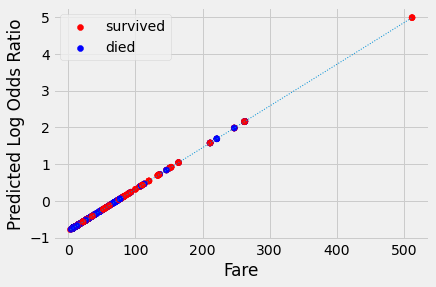

In [8]:
# do not worry about this code, it just generates the graph below
color =  df['survived'].replace(['yes', 'no'], ['red','blue'])
plt.scatter(df['fare'], predicted_log_odds, color = color)
plt.scatter([], [], c='red', label='survived')
plt.scatter([], [], c='blue', label='died')
fine_x = np.linspace(np.min(df['fare']), np.max(df['fare']), 1000)
fine_y = intercept + slope * fine_x
plt.plot(fine_x, fine_y, linewidth=1, linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Predicted Log Odds Ratio')
plt.legend();

Recall that we can convert the predicted log odds ratios to probabilities using the inverse logit transformation.

To do this, first we raise `e` to the power of the predicted log odds ratio, to get the predicted odds ratio.

In [9]:
# transform the predicted log odds ratios to odds ratios
predicted_odds_ratio = np.e**(predicted_log_odds)

# show the first 10 predictions
predicted_odds_ratio[:10]

0    0.478011
1    0.553545
2    0.553545
3    0.553545
4    0.478119
5    0.478119
6    0.578899
7    0.578899
8    0.541754
9    0.478394
Name: fare, dtype: float64

The plot below shows the predicted odds ratio of surival, as a function of `fare`:

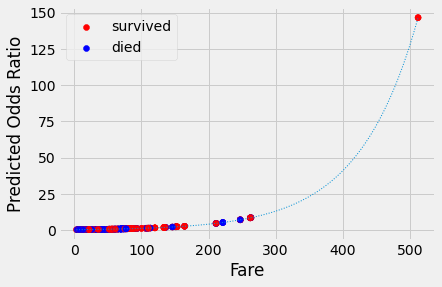

In [10]:
# do not worry about this code, it just generates the graph below
plt.scatter(df['fare'], predicted_odds_ratio, color = color)
plt.scatter([], [], c='red', label='survived')
plt.scatter([], [], c='blue', label='died')
fine_x = np.linspace(np.min(df['fare']), np.max(df['fare']), 1000)
fine_y = np.e**(intercept + slope * fine_x)
plt.plot(fine_x, fine_y, linewidth=1, linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Predicted Odds Ratio')
plt.legend();

Then we calculate the predicted probability of survival as follows:

$ \text{predicted probability} = \frac{\text{odds ratio}}{(1  +  \text{odds ratio})} $

In [11]:
# calculated the predicted probability of survival for each passenger
predicted_probability = predicted_odds_ratio/( 1+ predicted_odds_ratio)

# show the first 10 predictions

predicted_probability[:10]

0    0.323415
1    0.356311
2    0.356311
3    0.356311
4    0.323465
5    0.323465
6    0.366647
7    0.366647
8    0.351388
9    0.323590
Name: fare, dtype: float64

Our `inv_logit()` function will do both these steps:

In [12]:
# use the inv_logit() function to perform both of the steps above
predicted_probability = inv_logit(predicted_log_odds)

# show the first 10 predictions
predicted_probability[:10]

0    0.323415
1    0.356311
2    0.356311
3    0.356311
4    0.323465
5    0.323465
6    0.366647
7    0.366647
8    0.351388
9    0.323590
Name: fare, dtype: float64

Let's plot the predicted probabilities, alongside the original data:

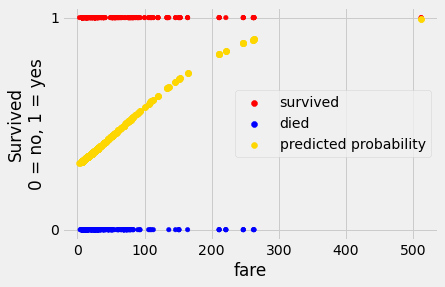

In [13]:
plot_survive_one_pred(df, 'fare')
plt.scatter(df['fare'], predicted_probability, color = 'gold', label = 'predicted probability')
plt.legend(loc = 'center right');

We can see that the predicted probability of survival increases as the amount paid for the `fare` increases.

## Interpreting the intercept 

Recall that the intercept, in its current form, tells us log odds ratio of survival when `fare` == 0. 

In [14]:
intercept

-0.8187334279328481

This is the point where the prediction line (on the log odds ratio scale) crosses the y axis:

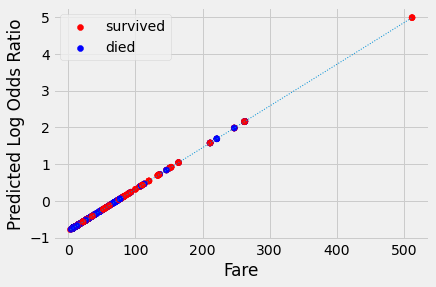

In [15]:
# this code is just here to generate the plot
color =  df['survived'].replace(['yes', 'no'], ['red','blue'])
plt.scatter(df['fare'], predicted_log_odds, color = color)
plt.scatter([], [], c='red', label='survived')
plt.scatter([], [], c='blue', label='died')
fine_x = np.linspace(np.min(df['fare']), np.max(df['fare']), 1000)
fine_y = intercept + slope * fine_x
plt.plot(fine_x, fine_y, linewidth=1, linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Predicted Log Odds Ratio')
plt.legend();

It is quite difficult to interpret the log odds ratio, because it is on the log scale. We can convert this log odds ratio intercept to an odds ratio, by raising `e` to the power of the intercept:

In [16]:
np.exp(intercept)

0.44098984635756855

This tells us the predicted odds ratio of survival for a `fare` of 0 is about 0.44, meaning that someone who paid a `fare` of 0 would have about a 4.4 to 10 chance of surviving.

In [17]:
4.4/10

0.44000000000000006

This means that for every 10 passengers with with a `fare` of 0 who died, we would expect 4.4 passengers with a `fare` of 0 to survive.

We can convert this to a probability using the same formula as above:

In [18]:
np.exp(intercept)/(1 + np.exp(intercept))

0.30603258411034

This tells us that the predicted probability of survival (of having a `survived_dummy` label of 1) is about 31% for a
passenger who paid a `fare` of 0.

## Interpreting the slope

The slope of a predictor in logistic regression tells us the average change in the log odds ratio of the event of interest  for every one unit increase in the predictor. In this case the predictor is `fare`, so the slope of `fare` tells us the change in the log odds ratio of survival for a 1 unit increase in `fare`.

Once again, to make this easier to interpret, we can convert this slope so that it relates to the odds ratio (rather than the log odds ratio).

We do this, as before, by raising `e` to the power of the slope:

$ e^{\text{slope}} = \frac{\text{odds ratio of event of interest AFTER one unit change in predictor}}{\text{odds ratio of event of interest BEFORE one unit change in predictor}}$

[Reference: https://www.juanbattle.com/files/2012/04/Regression-Logistic-4.pdf]

If odds ratio slope is greater than 1, this means the odds of event of interest (`survived`) are increasing as the predictor (`fare`) increases.

If the odds ratio slope is less than 1 means the odds of event of interest (`survived`) are decreasing as the predictor (`fare`) increases.

* Note: It is very important to note here that this is the odds ratio slope relates to the ratio of two odds ratios (AFTER/BEFORE). This means we cannot convert it into a probability in the same way as we can for the intercept odds ratio.*

In [19]:
print('The slope, expressed as a change in odds ratio =', np.exp(slope))

The slope, expressed as a change in odds ratio = 1.0114022595289869


The odds ratio of survival is 1.011402251453628 larger for every one-unit increase in fare.

Another way of saying this is that the odds ratio of survival increases by 0.011402251453628 (about 1.1%) for every one
unit increase in fare. You can see this by:

$ \text{percentage change in odds ratio} = (e^{slope} - 1) * 100 $

The `e^slope - 1` is the part of the slope that changes for the one unit increase in the predictor. Multiplying this by 100 converts it into a percentage.

In [20]:
# calculate the percentage change in the odds ratio
print((np.exp(slope) - 1) * 100, '%')

1.140225952898688 %


So in this case, the odds ratio of survival is increasing by about 1% for every 1 unit increase in fare.

Seems like a pretty good deal.

## Testing the slope

So far so good, but could this slope just be a fluke? In a world where there was no relationship between `fare` and `survived`, would it be surprising to get a slope as large as the one we obtained here?

We can test the signficance of the slope using simulation.

We will do this by shuffling the `survived_dummy` values. This simulates a situation where there is no relationship between 
`survived` and `fare`. We will then perform our logistic regression again, on the shuffled data.

We will do this numerous times and compare the slopes we get from our fake regression to the slope we actually obtained from the real data.

In [21]:
# shuffling the survival_dummy variable (run this cell a few times to see the values being shuffled)

fake_survive_dummy = df['survived_dummy'].copy()
    
np.random.permutation(fake_survive_dummy)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

The code for the simulation is in the cell below. It takes a while to run so we will keep the number of iterations low for now.

Read the comments and make sure you understand what every line is doing:

In [86]:
# set the number of iterations for the simulation
n_iters = 200

# create an array for the fake slopes
fake_slopes = np.zeros(n_iters)

# for each interation
for i in np.arange(n_iters):
    
    # copy the survival dummy variable from the original dataframe
    fake_survive_dummy = df['survived_dummy'].copy()
    
    # shuffle the survival dummy around (to make the association between "fare" and "surivival" random)
    fake_survive_dummy  = np.random.permutation(fake_survive_dummy)
    
    # perform a logistic regression on the fake data
    fake_fare_survive_log_reg  = minimize(mll_logit_cost,  # Cost function
                  [0,0],  # Guessed intercept and slope
                  args=(df['fare'], fake_survive_dummy),  # x and y values
                  tol=1e-5)
    
    # put the fake slope in the fake_slopes array
    fake_slopes[i] = fake_fare_survive_log_reg.x[1]

We can then plot the actual slope against the slopes we got in the simualtion:

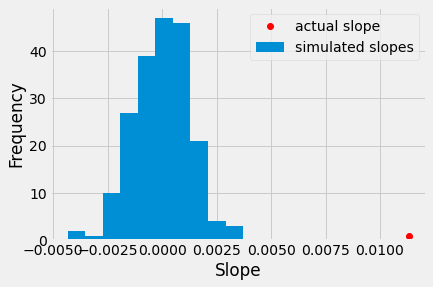

In [87]:
plt.hist(fake_slopes, label = 'simulated slopes')
plt.plot(slope, 1, 'o', color = 'red', label = 'actual slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.legend();

We can calculate a p-value for the slope by counting the number of simulated slopes which were as extreme as the actual slope.

This p-value tells us - in a world where there was no relationship between `fare` and `survival` - how likely it is we would have got a slope as large as the one obtained.

In [88]:
slope_fare_p_value = np.count_nonzero(fake_slopes >= np.abs(slope))/len(fake_slopes)

slope_fare_p_value

0.0

It is very unlikely we would observe this pattern if there was no relationship between `fare` and `survived`.

## Logistic Regression with a categorical predictor

We have seen how to test the signficance of the slope of a predictor variable. However, so far we have only used numerical predictor variables.

Often, we will want to predict the probability of an event of interest using a categorical predictor.

In logistic regression, this means we need to use dummy variables for the predictor variable and the outcome variable.

Let's return to our original dataframe:

In [25]:
df.head(10)

,name,gender,age,class,embarked,country,fare,survived,survived_dummy
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes,1
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,Southampton,United States,7.1300,yes,1
6,"Abelson, Mr. Samuel",male,30.0,2nd,Cherbourg,France,24.0000,no,0
7,"Abelson, Mrs. Hannah",female,28.0,2nd,Cherbourg,France,24.0000,yes,1
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,Cherbourg,Lebanon,18.1509,yes,1
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,Southampton,Finland,7.1806,yes,1


`class` is a categorical variable.

Let's predict `survived` from `class`. Did passengers from a particular class have better or worse chances of survival?

First, let's use `pd.crosstab()` to look at the counts:

In [26]:
# *Note:* `margins = True` tells the function to count the number of observations in each row/column, 
# these totals are shown under `All`.

pd.crosstab(df['class'], df['survived'], margins = True)

survived,no,yes,All
class,,,
1st,114,187,301
2nd,148,115,263
3rd,481,168,649
All,743,470,1213


From looking at this table, it definitely looks like `class` and `survived` are related. But the total numbers of people in each class are quite different. To make comparison easier, let's tell `pd.crosstab()` to show us the proportions who survived, within each class:

In [27]:
# *Note:* `normalize = 'index'` tells crosstab to show the proportions, across the rows
# so in this instance, this will show the proportion of survived ('yes' and 'no') for each class

cross_tab_norm = pd.crosstab(df['class'], df['survived'], margins = True, normalize = 'index')

cross_tab_norm

survived,no,yes
class,,
1st,0.378738,0.621262
2nd,0.562738,0.437262
3rd,0.741140,0.258860
All,0.612531,0.387469


This is very revealing. About 0.38, or 38%, of 1st class passengers died. Compared to about 0.74, or 74%, of 3rd class passengers.

We can see this relationship better in a stacked barplot:

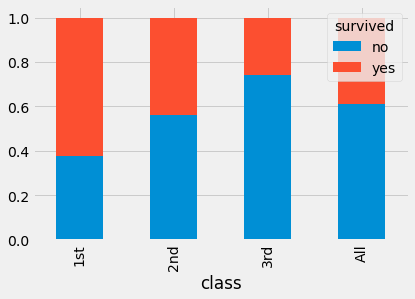

In [28]:
cross_tab_norm.plot.bar(stacked = True);

So that we can include `class` in a logistic regression, we need to create dummy variables for each level of the variable (1st, 2nd and 3rd).

To do this, there is a convenient function in pandas, `pd.get_dummies()`.

In [29]:
# create the dummy variables
class_dummies = pd.get_dummies(df['class'])

# show the first 10 passengers
class_dummies.head(10)

,1st,2nd,3rd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,1,0
8,0,0,1
9,0,0,1


For each column in the dataframe above, each passenger has either a 0 or a 1 indicating which class they were in. We can see that in the first 6 rows, all the passengers were `3rd` class, as they have a 1 in the `3rd` column, and 0s in the `1st` and `2nd` column.

This method of dummy coding - where we have separate dummy variables for each level of the categorical predictor - is called *one-hot* dummy coding.

Once we have performed our logisitic regression, we will have 3 slopes - one slope for each class:

&emsp; $ \text{predicted log odds ratio} = \text{slope}_{1st} * \text{dummy}_{1st} + \text{slope}_{2nd} * \text{dummy}_{2nd} + \text{slope}_{3rd} *  \text{dummy}_{3rd}
$


The dummy variables act like a switch. For the columns which the passenger has a 0 in, the 0 will 'switch off' the slope for that class. 


For instance, let's look at the first passenger in the dataframe (let's call them 'passenger 0'):

In [30]:
# passenger 0
class_dummies.iloc[0]

1st    0
2nd    0
3rd    1
Name: 0, dtype: uint8

Because passenger 0 is `3rd` class - i.e. they have a 1 in the `3rd` column and 0s in the `2nd` and `1st` column - we predict that their chances of survival we be the chances of survival for a `3rd` class passenger. The predicted log odds ratio of survival for passenger 0 will look like this:

&emsp; $ \text{predicted log odds ratio for passenger 0} = \text{slope}_{1st} * 0 + \text{slope}_{2nd} * 0 + \text{slope}_{3rd} * 1 
$

Because anything multiplied by 0 equals 0, the slopes for the `1st` and `2nd` class are 'switched off'. This means the prediction for passenger 0 boils down to:

&emsp;  $ \text{predicted log odds ratio for passenger 0} = \text{slope}_{3rd} * 1 $

This is what we want: because passenger 0 is `3rd` class, we want to predict their chances of survival using the predicted log odds of surival for a `3rd` class passenger.

By contrast, passenger 6 (row 6 in the dataframe above) is `2nd` class. We can see this as they have a 1 in the `2nd` column and 0s in the `1st` and `3rd` column:

In [31]:
# passenger 6
class_dummies.iloc[7]

1st    0
2nd    1
3rd    0
Name: 7, dtype: uint8

For passenger 6, we want to predict that their chances of survival are the chances of survival for a `2nd` class passenger.

The predicted log odds of survival for passenger 6 look like this:

&emsp; $ \text{predicted log odds ratio for passenger 6} = \text{slope}_{1st} * 0 + \text{slope}_{2nd} * 1 + \text{slope}_{3rd} * 0 $

Again, because anything multiplied by 0 equals 0, the slopes for the `1st` and `3rd` class are 'switched off' by the dummy variables. This means the prediction for passenger 0 boils down to:

&emsp;  $ \text{predicted log odds ratio for passenger 6} = \text{slope}_{2nd} * 1 $

Again, this is what we want. Passenger 6 is `2nd` class, so we predict their log odds of survival are those of a `2nd` class passenger.

Notice that this model contains only slopes, there is no intercept. We will discuss this further shortly.

But for now, let's re-write our cost function, so that we can use it with this model:

In [83]:
# negative log likelihood function, with no intercept

def multiple_mll_logit_cost_slopes_only(slopes, predictors, y):
    """ Cost function for maximum log likelihood

    Return minus of the log of the likelihood.
    """
    # create an array of zeros to store the predicted log odds ratios
    predicted_log_odds = np.zeros(len(y))

    # for each observation
    for i in np.arange(len(y)):

        # multiple the slopes by the predictor dummies (only one slope be used, as discussed above, the others
        # will be "switched off" by the 0 dummy variables)
        predicted_log_odds[i] = np.sum(slopes * predictors.iloc[i])

    # convert the predicted log odds ratio to probability
    pp_of_1 = inv_logit(predicted_log_odds)
        
    
    # Calculate predicted probabilities of actual labels.
    pp_of_correct_label = y * pp_of_1 + (1 - y) * (1 - pp_of_1)
        
    # Use logs to calculate log of the likelihood
    log_likelihood = np.sum(np.log(pp_of_correct_label))
        
    # return the negative log likelihood (we are trying to maximize the log likelihood, which is the same as minimizing
    # the negative log likelihood)
    return -log_likelihood

Let's test our new function, with an initial guess of 0 for each `class` slope:

In [84]:
multiple_mll_logit_cost_slopes_only([0,0,0], class_dummies, df['survived_dummy'])

840.7875300192136

In [85]:
one_hot_log_reg = minimize(multiple_mll_logit_cost_slopes_only,  # Cost function
                  [0.01, 0.01, 0.01],  # Guessed intercept and slopes
                  args=(class_dummies, df['survived_dummy']),  # predictors and y values
                  tol=1e-5)
# Show the result.
one_hot_log_reg

      fun: 751.0558820848566
 hess_inv: array([[ 0.01555087,  0.00020261,  0.00045068],
       [ 0.00020261,  0.0144457 , -0.00025469],
       [ 0.00045068, -0.00025469,  0.00801384]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([ 0.49491019, -0.25228012, -1.05190335])

Let's store these slopes separate python variables:

In [35]:
slope_1st_class_one_hot = one_hot_log_reg.x[0]

slope_2nd_class_one_hot = one_hot_log_reg.x[1]

slope_3rd_class_one_hot = one_hot_log_reg.x[2]

Just for interest, let's compare the slopes from `minimize` to the slope from Statsmodels:

In [81]:
# create the model
sm_model_one_hot = sm.Logit(df['survived_dummy'], class_dummies)

# fit the model
sm_model_one_hot = sm_model_one_hot.fit()

# show the model summary
display(sm_model_one_hot.summary())

print('1st class slope from minimize = ', slope_1st_class_one_hot)
print('2nd class slope from minimize = ', slope_2nd_class_one_hot)
print('3rd class slope from minimize = ', slope_3rd_class_one_hot)

Optimization terminated successfully.
         Current function value: 0.619172
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         survived_dummy   No. Observations:                 1213
Model:                          Logit   Df Residuals:                     1210
Method:                           MLE   Df Model:                            2
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                 0.07254
Time:                        18:08:44   Log-Likelihood:                -751.06
converged:                       True   LL-Null:                       -809.80
Covariance Type:            nonrobust   LLR p-value:                 3.069e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1st            0.4949      0.119      4.165      0.000       0.262       0.728
2nd           -0.2523      0.124     -2.029      0.042      -0.496      -0.009
3rd           -1.0519      0.090    -11.738      0.000      -1.228      -0.876
==============================================================================
"""

1st class slope from minimize =  0.4949101864473029
2nd class slope from minimize =  -0.25228012461155436
3rd class slope from minimize =  -1.0519033512677036


As mentioned earlier, these slopes, in their current form, relate to the log odds ratio of survival for passengers in each `class`.

Let's raise `e` to the power of each slope, to convert the slopes to the (more interpretable) odds ratio scale:

In [37]:
print('Un-logged 1st class slope from minimize = ', np.exp(slope_1st_class_one_hot))
print('Un-logged 2nd class slope from minimize = ', np.exp(slope_2nd_class_one_hot))
print('Un-logged 3rd class slope from minimize = ', np.exp(slope_3rd_class_one_hot))

Un-logged 1st class slope from minimize =  1.6403509066983213
Un-logged 2nd class slope from minimize =  0.7770270431808834
Un-logged 3rd class slope from minimize =  0.34927232811859976


Now they have been transformed, the slopes tell us how the *odds ratio* changes for a 1 unit increase in the predictor.

Because we have coded each class as a separate binary predictor, and because the binary predictor can only take the values 0 or 1, the slope tells us the predicted odds ratio when the predictor == 1. These slopes, then, tell us the predicted odds ratio of survival for each `class`.

If the odds ratio is greater than 1, it means survival was more likely than death, in that `class`.

If the odds ratio is less than than 1, it means death was more likely than survival, in that `class`.

We can see that survival is more likely than death for `1st` class passengers.

Death is more likely than survival for both the lower classes. The lowest odds ratio for survival is for the `3rd` class.

This is consistent with what we saw on our stacked barplot:

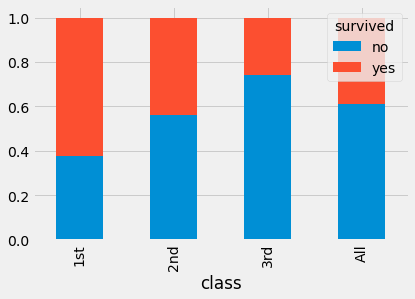

In [38]:
cross_tab_norm.plot.bar(stacked = True);

## The dummy variable trap

Now, there are risks to using the method of dummy variable coding shown above. The problem comes if we also try to fit an intercept to the model.

Let's run the logistic regression using Statsmodels, as it will illustrate the problem. The use of the `sm.add_constant()` function means we are also trying to fit an intercept to the model. 

In [39]:
sm.add_constant(class_dummies).head(10)

,const,1st,2nd,3rd
0,1.0,0,0,1
1,1.0,0,0,1
2,1.0,0,0,1
3,1.0,0,0,1
4,1.0,0,0,1
5,1.0,0,0,1
6,1.0,0,1,0
7,1.0,0,1,0
8,1.0,0,0,1
9,1.0,0,0,1


You can see that `sm.add_constant()` has added a column of 1.0's to the dataframe.

In the same way as the dummy variables for `class` act as "switches" for the `class` slopes, the column of 1.0's which is added by `sm.add_constant()` acts as an always-on "switch" for the intercept. This "switch" for the intercept is called the *constant* (it is always-on because it always equals 1, for every passenger).

So the model is now:

&emsp; $ \text{predicted log odds ratio} = 1 * \text{intercept} + \text{slope}_{1st} * \text{dummy}_{1st} + \text{slope}_{2nd} * \text{dummy}_{2nd} + \text{slope}_{3rd} *  \text{dummy}_{3rd}
$

For passenger 0, this is:

&emsp; $ \text{predicted log odds ratio for passenger 0} = 1 * \text{intercept} + \text{slope}_{1st} * 0 + \text{slope}_{2nd} * 0 + \text{slope}_{3rd} * 1 
$

Which, because the dummy variables act as a 'switch', boils down to:

&emsp; $ \text{predicted log odds ratio for passenger 0} = 1 * \text{intercept} + \text{slope}_{3rd} * 1 
$

In [40]:
# a quick look at what statsmodels finds for this model
sm.Logit(df['survived_dummy'], sm.add_constant(class_dummies)).fit().summary()

         Current function value: 0.619172
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         survived_dummy   No. Observations:                 1213
Model:                          Logit   Df Residuals:                     1209
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                 0.07254
Time:                        17:25:43   Log-Likelihood:                -751.06
converged:                      False   LL-Null:                       -809.80
Covariance Type:            nonrobust   LLR p-value:                 2.676e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2023   3.15e+06  -6.43e-08      1.000   -6.17e+06    6.17e+06
1st            0.6972   3.15e+06   2.22e-07      1.000   -6.17e+06    6.17e+06
2nd           -0.0500   3.15e+06  -1.59e-08      1.000   -6.17e+06    6.17e+06
3rd           -0.8496   3.15e+06   -2.7e-07      1.000   -6.17e+06    6.17e+06
==============================================================================
"""

So, this did produce a set of slopes, and an intercept. But there is a problem. If you look at the standard errors of the coefficients (below `std err` in the table above), you'll see that the numbers are huge:

In [41]:
# huge standard error
3.15*10**6

3150000.0

The standard errors are a measure of the uncertainty in the slope and intercept estimates.

The larger the standard error, the less we can trust the numbers the model produced. 

Here's an anology for the problem the model is facing, which produced these large standard errors:

<i> "Imagine you are participating in an experiment. The experimenters want to know if auditory or tactile distraction is worse for impairing performance on a specific task.</i>

<i> You're in the experiment, performing the task. Suddenly, a 110 dB alarm goes off, right by your ear. At the same time a research assistant pushes you forcefully and repeatedly. (We don't know how the experimenters got ethics clearance for this study). Both the alarm and the pushing go on until the end of the experiment, whilst you continue to perform the task. </i>

<i> At the end of the session, the experimenters ask you: 'which was more distracting: the alarm or the pushing?' </i>

<i> You can't work out which was more distracting, because one event correlates perfectly with the other. You were definitely distracted from the task, but its hard to know if the loud noise was worse, or if being pushed was worse, as they were both going on at the same time." </i>

Let's say the experimenters repeat exactly the same procedure for all their participants. They call the variables in the study `task_performance`, `being_pushed` and `loud_alarm`. In their study, they want to model `task_performance ~ being_pushed + loud_alarm`. 

Let's say they code `being_pushed` as 1 when the participant is being pushed, and `loud_alarm` as 1 when the alarm is going off.

The dummy codes for the predictor variables, for 20 participants, would look something like this:

In [42]:
# igore this code, it just generates the dataframe

experi = pd.DataFrame({'being_pushed': np.repeat(1, 20), 'loud_alarm': np.repeat(1, 20)})
experi

,being_pushed,loud_alarm
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


If the experimenters want to show that `being_pushed` was worse for performance than `loud_alarm` (or vice versa) they would need observations where `being_pushed == 1` and `loud_alarm == 0`. They would also need observations where `being_pushed == 0` and `loud_alarm == 1`. 

If they had these comparisons, and they found that the `task_performance` scores were lower when one predictor variable equalled 1 and the other equalled 0, this would provide evidence that that predictor was worse for task performance.

However, as it stands, because `being_pushed` and `loud_alarm` *always* co-occur, the experimenters cannot tell which is worse for `task_performance`. One way of putthing this, is that they would be left with a *high degree of uncertainty about which was worse*. 


Our logistic regression model faces a similar problem. To see what this is, let's add the `class` dummy variables together (this sum is shown in the `dummy_sum` column of the dataframe below):

In [43]:
dummy_sum = class_dummies['1st'] + class_dummies['2nd'] + class_dummies['3rd'] 

trap_df = pd.DataFrame(sm.add_constant(class_dummies))
trap_df['dummy_sum'] = dummy_sum
trap_df.head(10)

,const,1st,2nd,3rd,dummy_sum
0,1.0,0,0,1,1
1,1.0,0,0,1,1
2,1.0,0,0,1,1
3,1.0,0,0,1,1
4,1.0,0,0,1,1
5,1.0,0,0,1,1
6,1.0,0,1,0,1
7,1.0,0,1,0,1
8,1.0,0,0,1,1
9,1.0,0,0,1,1


To make the problem clearer, let's look at just the `const` and `dummy_sum` columns:

In [44]:
trap_df[['const', 'dummy_sum']].head(10)

,const,dummy_sum
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
5,1.0,1
6,1.0,1
7,1.0,1
8,1.0,1
9,1.0,1


Looks familiar? This is a similar problem to that faced by the experimenters in the example above. From our models "point of view", `const` and `dummy_sum` look the same - they are perfectly correlated. The model can't tell which is which. 

Because the model also cannot "see" the difference between `const` and the `class` dummy codes, it also cannot estimate the intercept or the slopes for each class accurately. The predictors and the intercept are getting 'blended' together.

This is what introduces the huge uncertainty, and large standard errors, into our logistic regression model.

 ### Solution to the dummy variable trap
 
 The solution is either to drop the intercept, or to drop one of the dummy variables.
 
 We've already seen the solution where we fit a model with no intercept, just one slope for each predictor.
 
 Let's now look at the method where we drop one of the dummy variables. `pd.get_dummies()` has a way of easily doing this, we just pass it the argument `drop_first = True`:

In [45]:
class_dummies_drop_one = pd.get_dummies(df['class'], drop_first = True)

class_dummies_drop_one.head(30)

,2nd,3rd
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


Now, you may be wondering how we know if an passenger is `1st` class, given that we do not have a column for this.

If both `2nd` and `3rd` equal 0, then that passenger must be `1st` class.

This coding scheme still tells us if a passenger is `1st` class - but it does so in virtue of having a 0 in both the `2nd` and `3rd` columns.

Let's look at row 24:

In [46]:
class_dummies_drop_one.iloc[23]

2nd    0
3rd    0
Name: 23, dtype: uint8

This passenger is `1st` class.

To see how this coding scheme solves the dummy variable trap, let's create a `dummy_sum` column by adding the dummy variables together. Let's also add a column of 1s, for the intercept:

In [47]:
# copying the dataframe
class_dummies_with_sum = class_dummies_drop_one.copy()

# calculating the sum of the dummy variables
class_dummies_with_sum['dummy_sum'] = class_dummies_with_sum['2nd'] + class_dummies_with_sum['3rd']

# adding an intercept with sm.add_constant()
class_dummies_with_sum = sm.add_constant(class_dummies_with_sum )

# show the first 30 passengers
class_dummies_with_sum.head(30)

,const,2nd,3rd,dummy_sum
0,1.0,0,1,1
1,1.0,0,1,1
2,1.0,0,1,1
3,1.0,0,1,1
4,1.0,0,1,1
5,1.0,0,1,1
6,1.0,1,0,1
7,1.0,1,0,1
8,1.0,0,1,1
9,1.0,0,1,1


Again, this will be clearer if we just look at the `const` column and the `dummy_sum` column:

In [48]:
class_dummies_with_sum[['const', 'dummy_sum']].head(30)

,const,dummy_sum
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
5,1.0,1
6,1.0,1
7,1.0,1
8,1.0,1
9,1.0,1


Remember, the problem before was that the `const` column (the always-on "switch" for the intercept) and the `dummy_sum` always both equalled 1 for every observation.

This meant the model could not tell the difference between them, and so could not estimate the parameters correctly.

This is the not the case now.

There are now some observations where `dummy_sum` equals 0 (e.g. row 22).

In [49]:
class_dummies_with_sum[['const', 'dummy_sum']].iloc[23]

const        1.0
dummy_sum    0.0
Name: 23, dtype: float64

This allows us to escape from the dummy variable trap, as the model can tell the difference between the intercept and the dummy variables.

Our model is now:

&emsp; $ \text{predicted log odds ratio} = 1 * \text{intercept} + \text{slope}_{2nd} * \text{dummy}_{2nd} + \text{slope}_{3rd} *  \text{dummy}_{3rd}
$

For passenger 0, this is:

&emsp; $ \text{predicted log odds ratio for passenger 0} = 1 * \text{intercept} + \text{slope}_{2nd} * 0 + \text{slope}_{3rd} * 1 
$

Which boils down to:

&emsp; $ \text{predicted log odds ratio for passenger 0} = 1 * \text{intercept} + \text{slope}_{3rd} * 1 
$

Our original cost function only expected one intercept and one slope. Let's re-write it so that it can accept multiple slopes. Again, read the comments and make sure you understand what each line is doing:

In [90]:
def multiple_mll_logit_cost(intercept_and_slopes, predictors, y):
    """ Cost function for maximum log likelihood

    Return minus of the log of the likelihood.
    """
    predictors = sm.add_constant(predictors)
    
    # create an array to store the predicted log odds ratios
    predicted_log_odds = np.zeros(len(y))
    
    # for every observation
    for i in np.arange(len(y)):
      
        # calculate the predicted log odds ratio for that prediction
        # the first element of intercept_and_slopes is the intercept
        # because we used sm.add_constat() on the predictors dataframe
        # the first element of predictors is a column of 1s
        # so the first element of intercepts_and_slopes gets multiplied
        # by 1, for every observation
        predicted_log_odds[i] = np.sum(intercept_and_slopes * predictors.iloc[i])

    # convert the log odds ratios to probabilities
    pp_of_1 = inv_logit(predicted_log_odds)
        
    
    # Calculate predicted probabilities of actual labels.
    pp_of_correct_label = y * pp_of_1 + (1 - y) * (1 - pp_of_1)
        
    # Use logs to calculate log of the likelihood
    log_likelihood = np.sum(np.log(pp_of_correct_label))
        
    # return the negative log likelihood (which is what we are trying to minimize)
    return -log_likelihood

Let's test our function, using first guesses of 0 for the intercept and the two slopes:

In [91]:
multiple_mll_logit_cost([0,0,0], class_dummies_drop_one, df['survived_dummy'])

840.7875300192136

Let's run a logistic regression, using this new dummy coding scheme:

In [92]:
drop_one_log_reg = minimize(multiple_mll_logit_cost,  # Cost function
                  [0.01, 0.01, 0.01],  # Guessed intercept and slopes
                  args=(class_dummies_drop_one, df['survived_dummy']),  # predictors and y values
                  tol=1e-5)
# Show the result.
drop_one_log_reg

      fun: 751.0558820848566
 hess_inv: array([[ 0.01170681, -0.00720062, -0.01371508],
       [-0.00720062,  0.00817749,  0.01405038],
       [-0.01371508,  0.01405038,  0.02698985]])
      jac: array([1.52587891e-05, 0.00000000e+00, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 66
      nit: 10
     njev: 13
   status: 2
  success: False
        x: array([ 0.49491024, -0.7471904 , -1.54681351])

Again, let's store these parameter estimates in separate variables:

In [93]:
intercept_drop_one = drop_one_log_reg.x[0]

slope_2nd_drop_one = drop_one_log_reg.x[1]

slope_3rd_drop_one = drop_one_log_reg.x[2]

And compare them to the parameters estimates found by Statsmodels:

In [94]:
# create the model
sm_model_drop_one = sm.Logit(df['survived_dummy'], sm.add_constant(class_dummies_drop_one))

# fit the model
sm_model_drop_one  = sm_model_drop_one.fit()

# show the model summary
display(sm_model_drop_one.summary())

print('Intercept (const) from minimize = ', intercept_drop_one)
print('2nd class slope from minimize = ', slope_2nd_drop_one)
print('3rd class slope from minimize = ', slope_3rd_drop_one)

Optimization terminated successfully.
         Current function value: 0.619172
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         survived_dummy   No. Observations:                 1213
Model:                          Logit   Df Residuals:                     1210
Method:                           MLE   Df Model:                            2
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                 0.07254
Time:                        21:37:49   Log-Likelihood:                -751.06
converged:                       True   LL-Null:                       -809.80
Covariance Type:            nonrobust   LLR p-value:                 3.069e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4949      0.119      4.165      0.000       0.262       0.728
2nd           -0.7472      0.172     -4.345      0.000      -1.084      -0.410
3rd           -1.5468      0.149    -10.393      0.000      -1.839      -1.255
==============================================================================
"""

Intercept (const) from minimize =  0.4949102442189479
2nd class slope from minimize =  -0.7471904038427504
3rd class slope from minimize =  -1.5468135144676147


Let's compare these to the parameter estimates we got from using the first method (with no intercept):

In [95]:
one_hot_log_reg.x

array([ 0.49491019, -0.25228012, -1.05190335])

The parameter estimates we got from the first method (no intercept, one-hot dummy coding) are slightly different to those we got from the second method (include an intercept, but drop a dummy variable).

Is something wrong here? No, it is just that the parameter estimates now represent slightly different things.

You can see that the first parameter estimate is the same for both methods: 0.4949. In both cases, this value is the predicted log odds ratio of surivival for `1st` class passengers.

In the model where we have dropped one of the dummy variables, the intercept now represents the category that the dropped dummy variable represented. This makes sense - we have two categorical predictors in the model, and the intercept tells us the predicted log odds ratio when both these predictors == 0. 

If both the predictors (`2nd` and `3rd` class) == 0 for an observation, this means that obervations was for a `1st` class passenger. So the intercept now represents the predicted log odds ratio for `1st` class passengers. This is why the value of the intercept is the same as the slope for `1st` class in the 'no intercept' model: 0.4949.

In the model with the intercept, the slope for `2nd` class, and the slope for `3rd` class, now tell us how different the log odds ratio was for those classes *relative to `1st` class*. `1st` class is the *reference category* against which we compare the other classes.

We can see this, because if we add the slopes from the model with the intercept to the value for the intercept, it will give us the same slopes as the 'no intercept' model:

In [56]:
intercept_drop_one + slope_2nd_drop_one

-0.25228015962380246

In [57]:
intercept_drop_one + slope_3rd_drop_one

-1.0519032702486668

Again, we can raise `e` to the power of the intercept and slopes, to transfrom them into odds ratios:

In [58]:
print('Odds ratio for 1st class (drop one model) =', np.exp(intercept_drop_one))
print('Odds ratio for 2nd class (drop one model)  =', np.exp(intercept_drop_one + slope_2nd_drop_one))
print('Odds ratio for 3rd class (drop one model)  =', np.exp(intercept_drop_one + slope_3rd_drop_one))

Odds ratio for 1st class (drop one model) = 1.6403510014640943
Odds ratio for 2nd class (drop one model)  = 0.7770270159754203
Odds ratio for 3rd class (drop one model)  = 0.3492723564163085


These are the same odds ratios we get from using the one-hot dummy coding method:

In [59]:
print('Odds ratio for 1st class (one-hot model) =', np.exp(slope_1st_class_one_hot))
print('Odds ratio for 2nd class (one-hot model) =' , np.exp(slope_2nd_class_one_hot))
print('Odds ratio for 3rd class (one-hot model) =', np.exp(slope_3rd_class_one_hot))

Odds ratio for 1st class (one-hot model) = 1.6403509066983213
Odds ratio for 2nd class (one-hot model) = 0.7770270431808834
Odds ratio for 3rd class (one-hot model) = 0.34927232811859976


The interpretation of these odds ratios is the same for both methods: greater than 1 means the surviving was more likely than dying in that class. Less than one means suriviving was less likely than dying in that class.

# Testing multiple slopes

If we want to get p-values for our coefficients from minimize, we can use a method very similar to the one shown earlier.

We shuffle the outcome variable dummy codes, to randomize the association between the predictors and the outcome. We then perform a logistic regression on the shuffled data.

We then compare the intercept/slopes we got from the actual data to the intercept/slopes we got in the simulation:

In [60]:
def test_slopes(predictor_vars, n_iters):
      
    # create an array for the fake slopes (n_iters rows, number of columns = number of predictors + 1 for the intercept)
    fake_params =  np.zeros([n_iters, len(predictor_vars.columns)+1])

    # count the number of parameters (number of predictors + 1 for the intercept)
    number_of_parameters = len(predictor_vars.columns) + 1
    

    # for each iteration
    for itr in np.arange(n_iters):
      
    # adding some progress printouts, as this is a slow function
        if itr == int(0.01 * n_iters):
            print('1% done')
        if itr == int(0.05 * n_iters):
            print('5% done')
        if itr == int(0.1 * n_iters):
            print('10% done')
        if itr == int(1/4 * n_iters):
            print('25% done')
        if itr == int(2/4 * n_iters):
            print('50% done')
        if itr == int(3/4 * n_iters):
            print('75% done')
        if itr == int(0.9 * n_iters):
            print('90% done')
            
        # copy the survived dummy codes
        fake_survive_dummy = df['survived_dummy'].copy()
        
        # shuffled the survived dummy codes
        fake_survive_dummy  = np.random.permutation(fake_survive_dummy)
        
        # perform a logistic regression with the shuffled data
        sim_log_reg = minimize(multiple_mll_logit_cost,  # Cost function
                      [np.repeat(0.1, number_of_parameters)],  # Guessed intercept and slopes
                      args=(predictor_vars, fake_survive_dummy),  # predictors and y values
                      tol=1e-5)
        
        # store the fake parameters 
        fake_params[itr] = sim_log_reg.x
          
    # show that the function has finished running
    print('100% done')
    
    return fake_params


Let's use our function to test the significance of the intercept and slope from minimize, in the model where we fitted an intercept and dropped one dummy variable:

*Note: this function will only work if we are fitting an intercept, as the number of parameters will be wrong if we are using one-hot coding, we would need a different function.*

In [61]:
# keep the iterations low
n_iters = 50

fake_params = test_slopes(class_dummies_drop_one, n_iters)    

1% done
5% done
10% done
25% done
50% done
75% done
90% done
100% done


In [62]:
# create a dataframe to store the simulation results
fake_params_df = pd.DataFrame(fake_params)

# name the columns of the simulation dataframe
fake_params_df.columns = ['intercept', 'class_2nd', 'class_3rd']

fake_params_df.head()

,intercept,class_2nd,class_3rd
0,-0.638813,0.230178,0.242328
1,-0.609561,0.153129,0.219480
2,-0.480814,-0.223761,0.129002
3,-0.452762,0.138411,-0.067114
4,-0.452762,0.028249,-0.021250


Now let's plot the actual coefficients (intercept and slopes) against the simulated ones.

We calculate the p-values in the same way as before, by using `np.count_nonzero()` to count the number of simulated coefficicents which were as extreme, or more extreme that the actual coefficient. We then divide by the number of simulated coefficients, to get the p-value:

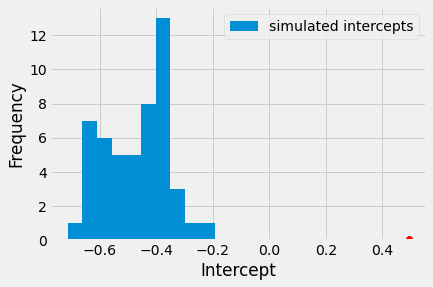

p =  0.0


In [63]:
# plot the simulated sampling distribution of the intercept
plt.figure()
plt.hist(fake_params_df['intercept'], label = 'simulated intercepts')
plt.plot(intercept_drop_one, 0.1, 'o', color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Intercept')
plt.legend()
plt.show()

# calculate the p-value for the intercept
p_value_inter = np.count_nonzero(fake_params_df['intercept'] >= np.abs(intercept_drop_one))/len(fake_params_df['intercept'])
print('p = ', p_value_inter)

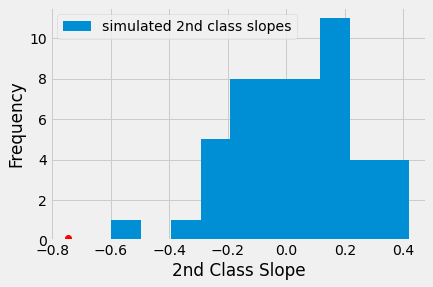

p =  0.0


In [64]:
# plot the simulated sampling distribution of the slope for 2nd class
plt.figure()
plt.hist(fake_params_df['class_2nd'], label = 'simulated 2nd class slopes')
plt.plot(slope_2nd_drop_one, 0.1, 'o', color = 'red')
plt.ylabel('Frequency')
plt.xlabel('2nd Class Slope')
plt.legend()
plt.show();

# calculate the p-value for the 2nd class slope
p_value_2nd_class = np.count_nonzero(fake_params_df['class_2nd'] >= np.abs(slope_2nd_drop_one))/len(fake_params_df['class_2nd'])
print('p = ', p_value_2nd_class)

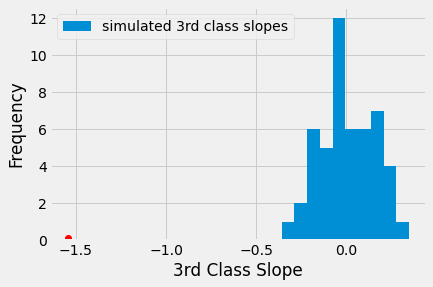

p =  0.0


In [65]:
# plot the simulated sampling distribution of the slope for 3rd class
plt.figure()
plt.hist(fake_params_df['class_3rd'], label = 'simulated 3rd class slopes')
plt.plot(slope_3rd_drop_one, 0.1, 'o', color = 'red')
plt.ylabel('Frequency')
plt.xlabel('3rd Class Slope')
plt.legend()
plt.show();

# calculate the p-value for the 3rd class slope
p_value_2nd_class = np.count_nonzero(fake_params_df['class_3rd'] >= np.abs(slope_3rd_drop_one))/len(fake_params_df['class_3rd'])
print('p = ', p_value_2nd_class)

## Logistic Regression with Multiple Predictors

Now that we have seen how to perform logistic regression with a categorical predictor, we have the tools to perform it with multiple predictors.

Using the 'one-hot' and 'drop one dummy' coding methods, we have effectively already used multiple predictors. Now we will predict `survived` with a mix of numerical and categorical predictors: `gender`, `age`, `class` and `fare`.

In [66]:
predictors_2 = df[['gender', 'age', 'class', 'fare']].copy()

predictors_2.head()

,gender,age,class,fare
0,male,42.0,3rd,7.11
1,male,13.0,3rd,20.05
2,male,16.0,3rd,20.05
3,female,39.0,3rd,20.05
4,female,16.0,3rd,7.13


We will use the "drop" coding method for the predictors (it is safer with respect to the dummy variable trap, if you are using several predictors). This means we must give `pd.get_dummies()` the argument `drop_first = True`.

In [67]:
predictors_2 = pd.get_dummies(predictors_2, drop_first = True)
predictors_2.head()

,age,fare,gender_male,class_2nd,class_3rd
0,42.0,7.11,1,0,1
1,13.0,20.05,1,0,1
2,16.0,20.05,1,0,1
3,39.0,20.05,0,0,1
4,16.0,7.13,0,0,1


We can see that we have one variable for gender, pandas helpfully tells us what the 1 in this column represents. The dummy column is named `gender_male` meaning that 1 means the passenger was male. 

For `class_2nd` each passenger has a 1 if they were `2nd` class, and a 0 otherwise. For `class_3rd` each passenger has a 1 if they were `3rd` class, and a 0 otherwise. 

We already modified our cost function to accept multiple predictors, so now we just need to give it one initial guess for each predictor slope, and one extra guess (at index 0) for the intercept:

In [68]:
# testing our cost function with 5 predictors and 1 intercept
multiple_mll_logit_cost([0.1, 0.1, 0.1, 0.1, 0.1, 0.1,], predictors_2, df['survived_dummy'])

4237.038057809044

Let's run the logistic regression and show the results:

In [69]:
multi_log_reg = minimize(multiple_mll_logit_cost,  # Cost function
                  [.1, .1,.1,.1,.1,.1,],  # Guessed intercept and slopes
                  args=(predictors_2, df['survived_dummy']),  # predictors and y values
                  tol=1e-5)
# Show the result.
multi_log_reg

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\peter\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


      fun: 559.302948694585
 hess_inv: array([[ 7.78324779e-02, -2.00421193e-04, -2.74150403e-04,
        -3.88269921e-02, -4.12108703e-02, -7.76314124e-02],
       [-2.00421193e-04,  2.27044413e-05, -1.76937421e-06,
        -8.56843398e-04,  1.42750720e-04,  1.77712672e-04],
       [-2.74150403e-04, -1.76937421e-06,  3.60483905e-06,
         8.77912017e-05,  1.91802882e-04,  2.75918523e-04],
       [-3.88269921e-02, -8.56843398e-04,  8.77912017e-05,
         9.78080985e-02, -2.79352736e-03,  3.96832857e-02],
       [-4.12108703e-02,  1.42750720e-04,  1.91802882e-04,
        -2.79352736e-03,  5.96327139e-02,  4.10679826e-02],
       [-7.76314124e-02,  1.77712672e-04,  2.75918523e-04,
         3.96832857e-02,  4.10679826e-02,  7.74534002e-02]])
      jac: array([7.62939453e-06, 2.28881836e-05, 4.57763672e-05, 7.62939453e-06,
       0.00000000e+00, 7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 229
      nit: 18
     njev: 28
   sta

Let's store the intercept and slope in separate python variables:

In [70]:
intercept = multi_log_reg.x[0]
slopes = multi_log_reg.x[1:]

Again, let's compare these to slopes obtained from Statsmodels:

In [71]:
sm_multi_logit = sm.Logit(df['survived_dummy'], sm.add_constant(predictors_2)).fit()

sm_multi_logit.summary()

Optimization terminated successfully.
         Current function value: 0.461091
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         survived_dummy   No. Observations:                 1213
Model:                          Logit   Df Residuals:                     1207
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.3093
Time:                        17:57:47   Log-Likelihood:                -559.30
converged:                       True   LL-Null:                       -809.80
Covariance Type:            nonrobust   LLR p-value:                4.863e-106
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9800      0.374     10.652      0.000       3.248       4.712
age            -0.0395      0.006     -6.399      0.000      -0.052      -0.027
fare           -0.0023      0.002     -1.233      0.218      -0.006       0.001
gender_male    -2.5897      0.159    -16.241      0.000      -2.902      -2.277
class_2nd      -1.4550      0.250     -5.821      0.000      -1.945      -0.965
class_3rd      -2.6076      0.256    -10.181      0.000      -3.110      -2.106
===============================================================================
"""

In [72]:
print('Intercept from minimize =', intercept)
print('Slopes from minimize =', slopes)

Intercept from minimize = 3.980020644675494
Slopes from minimize = [-3.95091757e-02 -2.33428489e-03 -2.58968059e+00 -1.45501564e+00
 -2.60764803e+00]


*Note: some of the slopes from minimize are given in scientific notation. To convert this to normal notation, move the digits as directed by the value that comes after e. So for e-02 move the digits two places in the negative direction. So -3.95091757e-02 is -0.0395091757 etc. If you do this, you'll see that minimize obtained the same coefficients as Statsmodels...*

To interpret this coefficients, it is much better to convert them to odds ratios:

In [73]:
print(np.exp(intercept))
print(np.exp(slopes))

53.51813908070082
[0.96126113 0.99766844 0.07504401 0.23339671 0.0737077 ]


We can also do this with the coefficients from Statsmodels:

In [74]:
np.exp(sm_multi_logit.params)

const          53.517916
age             0.961261
fare            0.997668
gender_male     0.075044
class_2nd       0.233397
class_3rd       0.073708
dtype: float64

The intercept is more difficult to interpret than for the simple model with one categorical predictor. It now tells us the predicted odds ratio of survival when *all* the predictors == 0. So that would be the odds ratio of survival for a passenger 0 years of age, who paid 0 fare, who was female (`gender_male == 0`), and who was `1st` class (`class_2nd == 0` and `class_3rd == 0)`.

The slope for each predictor tell us how the odds ratio of survival *changes* for a one unit increase in the predictor.

So for `age`, for every one unit increase in `age` the odds ratio is 0.961261 times as large, meaning it gets smaller as `age` increases. We can see that this is consistent with a negative slope for `age` before it was transformed.

For `fare`, for every one unit increase in `fare` the odds ratio is 0.997668 times as large, meaning it gets smaller as `fare` increases. We can see that this is consistent with a negative slope for `fare` before it was transformed. 

Interestingly, this is the opposite relationship to the one we observed when predicted `survived` from `fare` by itself. As with linear regression, using multiple predictors in logistic regression gives us slopes which control for the effects of the other predictors. In this case, the relationship between `fare` and `survived` has reversed when we control for the other predictors. Also you look at the associated p-value in the Statsmodels summary, under `P>|z|` we can see that `fare` is no longer a significant predictor of survival, once we control for the other relationships.

In this instance, `class` is a better predictor of surival than `fare`. Graphical inspection shows us that there were a number of 1st class passengers who paid very low fares, for whatever reason. Look between 0 and 100 on the x axis on the three graphs below to verify this.

Essentially, when `fare` is equal between passengers, the higher class passengers were more likely to survive than lower class passengers who paid the same `fare`.

That is why `fare` is not a significant predictor of survival once we control for class. One way of thinking of this is that, if we know someone's `class`, this has more predictive power for their survival than `fare` does.

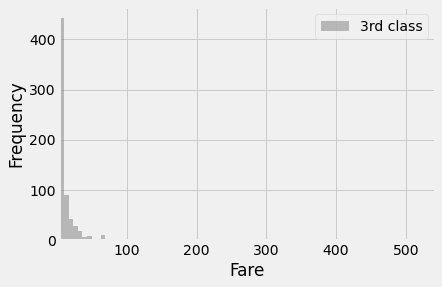

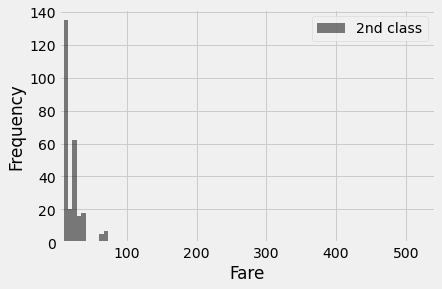

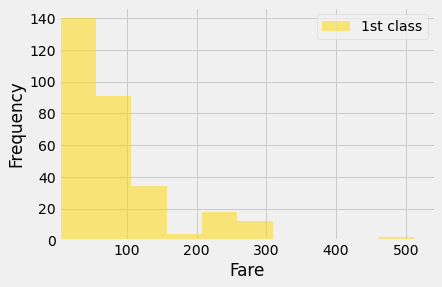

In [75]:
# ignore this code, it just generates the plots below
plt.figure()
plt.hist(df[df['class'] == '3rd']['fare'], alpha = 0.5, color = 'gray', label = '3rd class')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim([np.min(df['fare']), np.max(df['fare'] + 30)])
plt.legend()
plt.figure()
plt.hist(df[df['class'] == '2nd']['fare'], alpha = 0.5, color = 'black', label = '2nd class')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim([np.min(df['fare']), np.max(df['fare'] + 30)])
plt.legend()
plt.figure()
plt.hist(df[df['class'] == '1st']['fare'], alpha = 0.5, color = 'gold', label = '1st class')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim([np.min(df['fare']), np.max(df['fare'] + 30)])
plt.legend();

For `gender_male` the slope tells you how the odds ratio differs between males (`gender_male == 1`) and females (`gender_male == 0`). The odds ratio of survival is 0.075044 times as large for males as females. One way of verbally interpreting this is to say that the odds of survival are 7.5% as large for males as for females. 

Again we can see that this is consistent with graphical inspection of the `gender` and `survived`:

survived,no,yes
gender,,
female,0.272109,0.727891
male,0.806995,0.193005
All,0.612531,0.387469


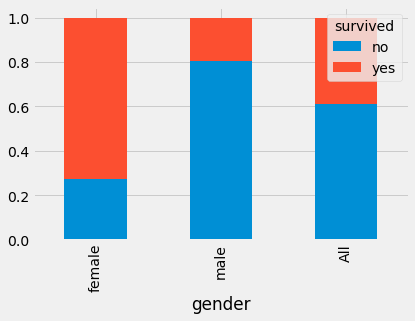

In [76]:
cross_tab_gender_norm = pd.crosstab(df['gender'], df['survived'], margins = True, normalize = 'index')

display(cross_tab_gender_norm)

cross_tab_gender_norm.plot.bar(stacked = True);

For `class_2nd`, given that we used dummy coding which dropped `1st` class, we must interpret the slope with reference to the `1st` class category. The slope for `class_2nd` tells us how much the odds ratio of survival differs between 1st class and 2nd class passengers. It tells us that the odds ratio was 0.233397 times as large for `2nd` class relative to `1st` class passengers. Another way of saying this is that the odds ratio of survival for `2nd` class passengers was only 23% as large as the odds ratio for `1st` class passengers.

The interpretation of the slope for `class_3rd` is the same. It tells us that the odds ratio was 0.073708 times as large for `3rd` class relative to `1st` class passengers. Alternatively, the odds ratio of survival for `3rd` class passengers was 7% as large as that for `1st` class passengers.

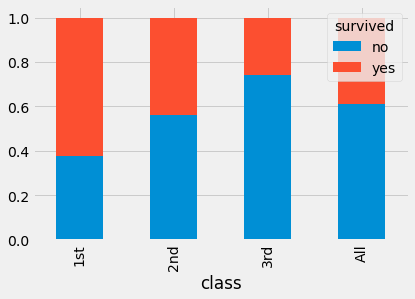

In [77]:
cross_tab_norm.plot.bar(stacked = True);